Decision Trees

In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [60]:
data_import = pd.read_csv(r"E:\hamza\hands on ML  cousre\Data sets\Chapter 6 - clothing_size.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [61]:
data_import["size"].value_counts()

size
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: count, dtype: int64

Data preparation


dealing with NA

In [62]:
data_step_one = data_import.copy()

data_step_one = data_step_one.dropna(axis=0) #axis=0 removes rows that contain null values

dropped_rows = len(data_import) - len(data_step_one)

print ("rows dropped = ", dropped_rows)

rows dropped =  581


we also drop the XXL records since we don't have a representative amount of this data (data size it too small)

In [63]:
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


Train Test Split

In [64]:
X = data_step_one[["weight" , "age" , "height"]]
y = data_step_one["size"] #we wants to predict the size

In [65]:
X

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72
...,...,...,...
119729,63,42.0,175.26
119730,45,29.0,154.94
119731,61,31.0,172.72
119732,74,31.0,167.64


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)

Modeling

In [67]:
def decision_tree_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth= depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)

decision_tree_run(None)

0.5050638709349077

Multiple Runs with different Tree Dephts

In [68]:
accuracy = []
tree_depth = list(range(2, 100, 3))

In [69]:
for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.4428724108097104,
 0.5035625222657641,
 0.5145045549391827,
 0.5143264288258944,
 0.5087790727263474,
 0.5067178991297268,
 0.5051911038729706,
 0.5048094050587816,
 0.5049875311720698,
 0.5048857448216194,
 0.5046821721207186,
 0.5050893175225202,
 0.5050129777596825,
 0.5049620845844572,
 0.5049620845844572,
 0.5049366379968446,
 0.5050129777596825,
 0.5047330652959439,
 0.504911191409232,
 0.5050893175225202,
 0.5048094050587816,
 0.5048348516463942,
 0.504783958471169,
 0.504656725533106,
 0.504783958471169,
 0.5049620845844572,
 0.504911191409232,
 0.5045803857702682,
 0.5051402106977454,
 0.5049620845844572,
 0.5048348516463942,
 0.5046312789454934,
 0.5048348516463942]

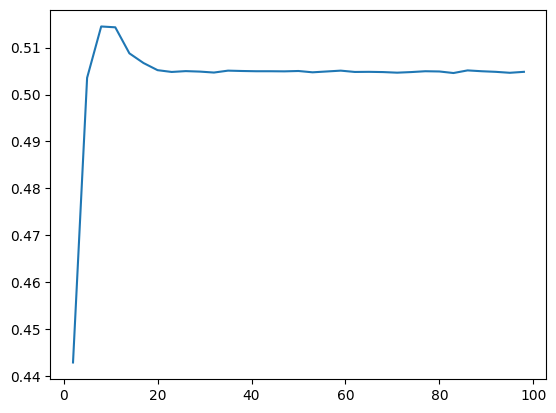

In [70]:
plt.plot(tree_depth, accuracy)

Evaluation 


Decision Tree Graph

In [71]:
from sklearn.tree import export_graphviz

In [72]:
tree_clf = DecisionTreeClassifier(max_depth= 5)
tree_clf.fit(X_train, y_train)

export_graphviz(
    tree_clf, 
    out_file = "iris_tree.dot",
    feature_names = X_train.columns, 
    rounded = True,
    filled = True
)

https://dreampuf.github.io/GraphvizOnline/?engine=dot#digraph%20G%20%7B%0A%0A%20%20subgraph%20cluster_0%20%7B%0A%20%20%20%20style%3Dfilled%3B%0A%20%20%20%20color%3Dlightgrey%3B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%2Ccolor%3Dwhite%5D%3B%0A%20%20%20%20a0%20-%3E%20a1%20-%3E%20a2%20-%3E%20a3%3B%0A%20%20%20%20label%20%3D%20%22process%20%231%22%3B%0A%20%20%7D%0A%0A%20%20subgraph%20cluster_1%20%7B%0A%20%20%20%20node%20%5Bstyle%3Dfilled%5D%3B%0A%20%20%20%20b0%20-%3E%20b1%20-%3E%20b2%20-%3E%20b3%3B%0A%20%20%20%20label%20%3D%20%22process%20%232%22%3B%0A%20%20%20%20color%3Dblue%0A%20%20%7D%0A%20%20start%20-%3E%20a0%3B%0A%20%20start%20-%3E%20b0%3B%0A%20%20a1%20-%3E%20b3%3B%0A%20%20b2%20-%3E%20a3%3B%0A%20%20a3%20-%3E%20a0%3B%0A%20%20a3%20-%3E%20end%3B%0A%20%20b3%20-%3E%20end%3B%0A%0A%20%20start%20%5Bshape%3DMdiamond%5D%3B%0A%20%20end%20%5Bshape%3DMsquare%5D%3B%0A%7D

this link for visualize the tree. dot

In [73]:
results = pd.DataFrame(data = {"Predictions": tree_clf.predict(X_test).tolist(), "Actual": y_test.tolist() }) #tree_clf.predict(X_test) gives a NumPy array.tolist() turns it into a regular Python list, so it's easier to put into a DataFrame.
results["Matching"] = results.apply(lambda x: "Correct" if x["Predictions"] == x["Actual"] else "Wrong",axis=1) #Uses .apply() with a lambda function to process row by row (axis=1). For each row: If the prediction matches the actual value → sets "Correct". If they don’t match → sets "Wrong"
results

,Predictions,Actual,Matching
0,M,M,Correct
1,M,M,Correct
2,L,L,Correct
3,XXS,XXS,Correct
4,XXS,S,Wrong
...,...,...,...
39293,XL,XL,Correct
39294,M,S,Wrong
39295,XXS,S,Wrong
39296,XL,XXXL,Wrong


In [74]:
#Group by Actual and Matching, and do aggregation if needed
correct_wrong_data = results.groupby(["Actual", "Matching"])["Predictions"].count().reset_index() #Grouping the results by the actual class and whether the prediction was correct or wrong.
                                                                                                  #Then count how many times each group appears. reset_index() turns the groupby result into a proper DataFrame again.
correct_wrong_data["Labels"] = correct_wrong_data["Actual"].astype(str) + " _ " + correct_wrong_data["Matching"]
correct_wrong_data["Colors"] = correct_wrong_data["Matching"].map(lambda x: "b" if x == "Correct" else "r")

correct_wrong_data

,Actual,Matching,Predictions,Labels,Colors
0,L,Correct,1568,L _ Correct,b
1,L,Wrong,4197,L _ Wrong,r
2,M,Correct,5818,M _ Correct,b
3,M,Wrong,3863,M _ Wrong,r
4,S,Correct,3096,S _ Correct,b
5,S,Wrong,4109,S _ Wrong,r
6,XL,Correct,2565,XL _ Correct,b
7,XL,Wrong,3818,XL _ Wrong,r
8,XXS,Correct,1540,XXS _ Correct,b
9,XXS,Wrong,1776,XXS _ Wrong,r


<function matplotlib.pyplot.show(close=None, block=None)>

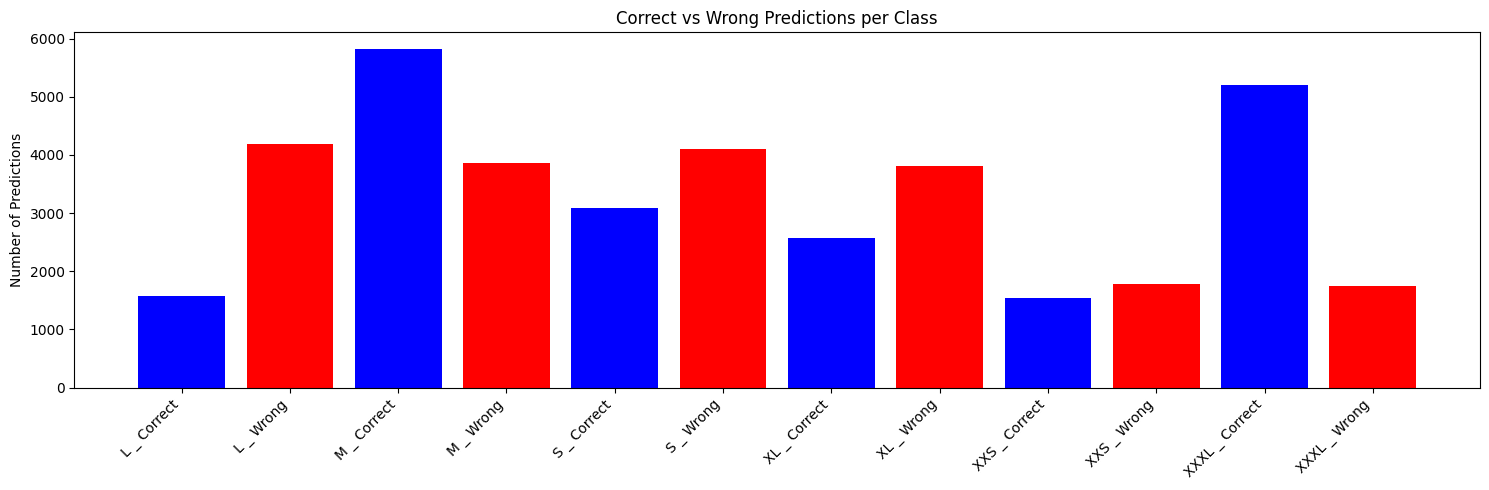

In [75]:
plt.figure(figsize = (15,5))
fig = plt.bar(x = correct_wrong_data["Labels"], height=correct_wrong_data["Predictions"], color=correct_wrong_data["Colors"] )
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Predictions")
plt.title("Correct vs Wrong Predictions per Class")
plt.tight_layout()
plt.show

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [77]:
confusion_matrix = confusion_matrix(y_test, tree_clf.predict(X_test), labels = y_test.unique()) 
labels = sorted(set(y_test))  # or: np.unique(y_test) this line is to store the labels of the y(size categories) display the labels on the graph
confusion_matrix

array([[5818, 1320,  194, 1617,  120,  612],
       [2100, 1568,   18,  213,  333, 1533],
       [ 338,    9, 1540, 1417,    8,    4],
       [2772,  200, 1058, 3096,   21,   58],
       [ 152,  272,   10,   13, 5202, 1299],
       [1091, 1255,   10,  102, 1360, 2565]])

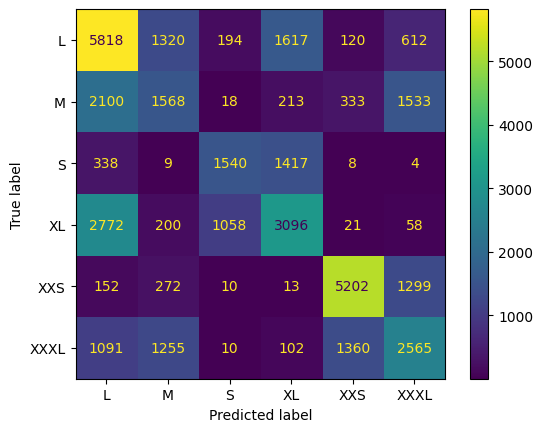

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels=labels) 
disp.plot()
plt.show()